In [11]:
# loading in all the essentials for data manipulation
import pandas as pd
import numpy as np
#load inthe NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords
# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize
# Lemmatizer helps to reduce words to the base form
from nltk.stem import WordNetLemmatizer
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams
# We can use counter to count the objects
from collections import Counter
# This is our visual library
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
def word_frequency(sentence):
    # joins all the sentenses
    #sentence = " ".join(sentence)
    # creates tokens, creates lower class, removes numbers and lemmatizes the words
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    #counts the words, pairs and trigrams
    counted = Counter(new_tokens)
    counted_2= Counter(ngrams(new_tokens,2))
    counted_3= Counter(ngrams(new_tokens,3))
    #creates 3 data frames and returns thems
    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
    trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
    return word_freq,word_pairs,trigrams

<Axes: xlabel='frequency', ylabel='trigrams'>

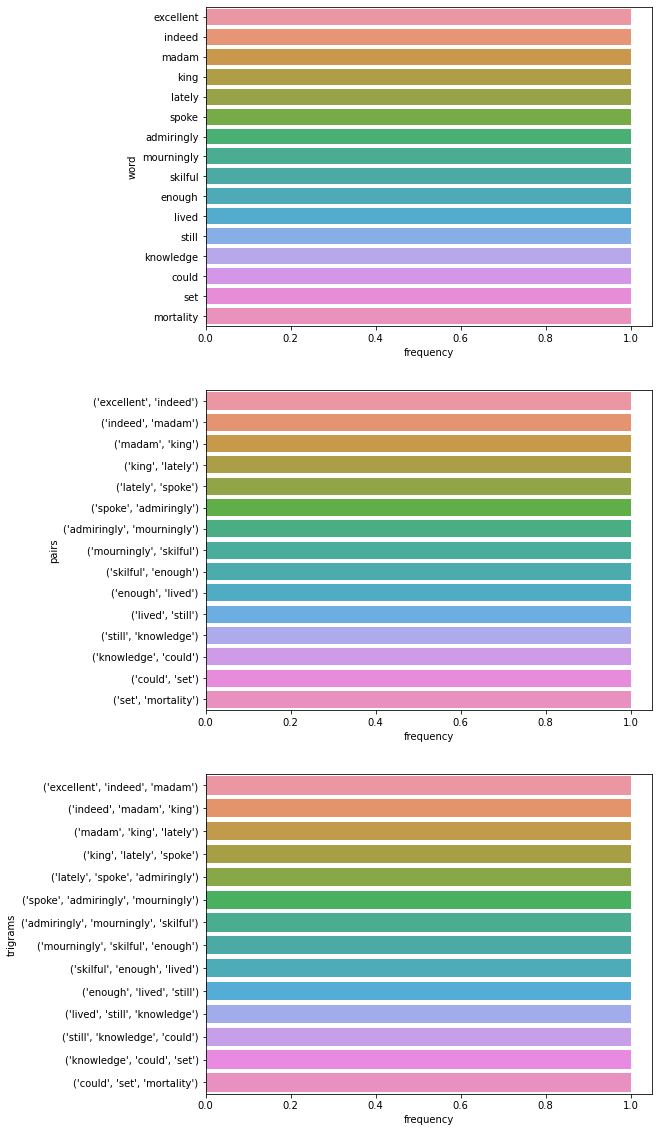

In [13]:
# create subplot of the different data frames

sentence = '''
    He was excellent indeed, madam: the king very
    lately spoke of him admiringly and mourningly: he
    was skilful enough to have lived still, if knowledge
    could be set up against mortality
    '''

data2,data3,data4 = word_frequency(sentence)


fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=data2.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=data3.head(30))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=data4.head(30))

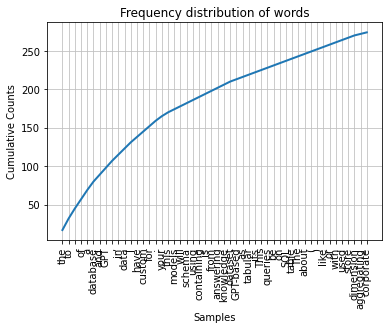

In [9]:

import nltk
from nltk import FreqDist
import matplotlib.pyplot as plt

text = """
Summary
GPT-based models have inherent problems such as correctly aggregating figures in tabular structures and getting access to corporate data in database system
I will show an approach how to connect GPT to your custom database schema using the Langchain Python package, making use of its SQLDatabaseChain. This allows text-based queries to be executed on the custom database schema.
Using this approach GPT shows impressive results in its ability to formulate complex SQL queries to the database, including queries containing 3 table joins and is able to retrieve the correct data from the database.
Introduction
The last few blog posts I have written were about extending the use of GPT-based models for tasks as question answering from tabular data and answering questions from documents.

In this post I will extend upon both of those ideas to examine what the capabilities are of these large language models for navigating more complex custom database schemas. This will touch upon two main drawbacks of the GPT-based models:

GPT cannot calculate: as I have shown in my blog post on question answering from tabular data, GPT is prone to miscalculate the simplest of additions. To circumvent this, I have shown that by moving the data into a SQL-supported database and using GPT to generate the SQL instead, this is a good combination of the right tool for the right job (e.g. GPT for SQL generation and the database for aggregating numbers).
GPT does not have knowledge about your custom dataset: data living in either your knowledge platform like SharePoint or in a corporate database like an ERP-system, warehouse management system or point of sale solution. This either requires finetuning your model on your custom dataset or using a library like LlamaIndex to include the domain knowledge with your prompt.
Today I will combine these two observations by investigating if GPT can be used for answering text-based questions about data in a SQL-based database, using a custom schema and a custom dataset that GPT has no knowledge of.

Data and database schema
The data I have used is posted to Github at the following link: https://github.com/kemperd/langchain-sqlchain/tree/main/data

Each of the CSV-files needs to be store in its own table. I have used DBeaver (https://dbeaver.io) for this purpose which offers a nice mass import feature to bulk load all CSVs into their own table at once.

The CSV files represent a retail dataset with some point of sale transactions with references across three different dimensions:

Product dimension containing a reference to a product group
Location dimension containing city, state and location (grouping of states)
Store dimension containing store, store brand and a chain
"""

#Tokenization
tokens = nltk.word_tokenize(text)

#compute freq distribution
freq_dist = FreqDist(tokens)

#plot the freq distribution
freq_dist.plot(50, cumulative=True)

#set labels and title
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency distribution of words')

plt.show()